# ISLP - Chapter 3 - Exercise 10
### Author: pzuehlke

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

__10 (a):__

In [14]:
carseats = pd.read_csv("Carseats.csv")
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [15]:
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [16]:
# One-hot encoding of the qualitative predictors `US` and `Urban``:
carseats['Urban'] = carseats['Urban'].map({'Yes': 1, 'No': 0})
carseats['US'] = carseats['US'].map({'Yes': 1, 'No': 0})

# Model matrix:
X = carseats[['Price', 'Urban', 'US']]
# Add a constant term for the intercept:
X = sm.add_constant(X)

In [17]:
# Fit the model:
y = carseats['Sales']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 04 Feb 2025   Prob (F-statistic):           2.39e-23
Time:                        20:20:38   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

__10 (b):__ Interpretation of the coefficients:

* Intercept (`const`) $ = 13.0435$: when price $ = 0 $, and `urban` and `us` are
  both "No", the estimated sales would be 13.04 units.
* `Price` $ = -0.0545 $: for each $ \$1 $ increase in price, the expected sales
  decrease by $ 0.0545 $ units.
* `US` $ = 1.2006 $: stores in the US sell $ 1.20 $ more units compared to stores outside the US.
* `Urban` $ = -0.0219 $: stores in urban areas sell $ 0.0219 $ fewer units
  compared to rural stores. However, note that this coefficient's $ p $-value 
  is quite high, so that this effect is not statistically significant.

__10 (c):__
$$
    \widehat{\text{Sales}} = 13.0435 - 0.0545 \, \text{Price} 
    - 0.0219 \, \text{Urban} + 1.2006 \, \text{US}
$$
Here $ \text{Urban} $ is either $ 1 $ or $ 0 $ depending on whether the store is
an urban area or not, respectively, and similarly for $ \text{US} $, so that
these variables can only take on two values. In effect, we have four different
regression lines, one for each of the four possible combinations of the `Urban` and
`US`.

__9 (d):__ We can reject the null hypothesis for the intercept and the
coefficients of `price` and `us`, since the associated $ p $-values are
essentially zero. However, we definitely cannot reject the hypothesis that the
coefficient of `Urban` is $ 0 $, and thus that sales are not associated at all
to this variable.

__10 (e):__ 

In [18]:
X = carseats[['Price', 'US']]
X = sm.add_constant(X)
y = carseats['Sales']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 04 Feb 2025   Prob (F-statistic):           2.66e-24
Time:                        20:20:40   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

The $ R^2 $ statistic for the new model is equal to that of the model
including `Urban` as one of the predictors, but the new model is easier to
interpret since it has fewer variables. Unfortunately, neither model seems to
fit the data well because this common $ R^2 $ is small, only $ 0.239 $,
indicating that they explain $ 23.9\% $ of the variance in sales.

__10 (f):__ According to the table above, the confidence intervals are:
$$
\begin{aligned}
    \text{Intercept:} & \quad [11.790, 14.271] \\
    \text{Price:} & \quad [-0.065, -0.044] \\
    \text{US:} & \quad [0.692, 1.708] \\
\end{aligned}
$$

__10 (g):__ Here is a plot of the residuals against the fitted values: 

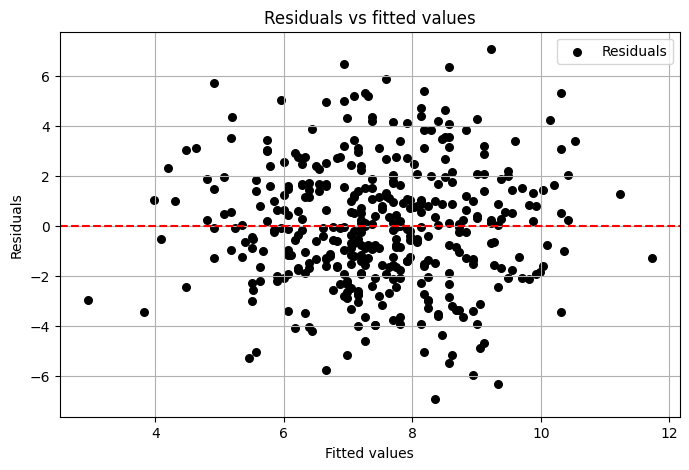

In [19]:
fitted_values = model.fittedvalues
residuals = model.resid

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(fitted_values, residuals, color="black", label="Residuals", s=30)
ax.axhline(y=0, color="red", linestyle="dashed", linewidth=1.5)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residuals")

ax.set_title("Residuals vs fitted values")
ax.legend()
ax.grid(True)
plt.show()

The model looks pretty homoscedastic. To be able to identify the presence of
outliers more easily, let's plot the standardized (studentized) residuals, given
by:
$$
    \text{$ i $-th standardized residual} = \frac{e_i}{\hat{\sigma}_e}
$$
where $ \hat{\sigma}_e​ $ is the standard deviation of the residuals.

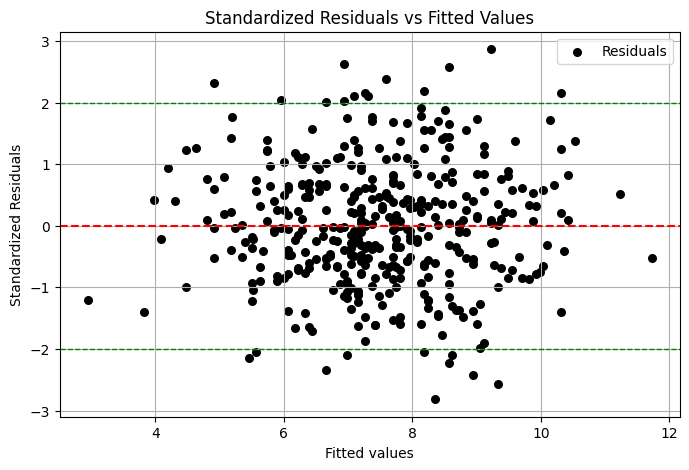

In [21]:
# Standardized residuals:
standardized_residuals = residuals / np.std(residuals)

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(fitted_values, standardized_residuals, color="black", label="Residuals", s=30)

# Add horizontal reference lines at 0, ±2: 
ax.axhline(y=0, color="red", linestyle="dashed", linewidth=1.5)
ax.axhline(y=2, color="green", linestyle="dashed", linewidth=1)
ax.axhline(y=-2, color="green", linestyle="dashed", linewidth=1)

ax.set_xlabel("Fitted values")
ax.set_ylabel("Standardized Residuals")
ax.set_title("Standardized Residuals vs Fitted Values")
ax.legend()
ax.grid(True)

plt.show()

There are no strong outliers (those with absolute value $ > 3 $ when
standardized). Even though a few residuals lie outside $ [-2, 2] $ when
standardized, this is to be expected from the number of data points. 

High Leverage Observations: [ 42 125 155 156 159 165 171 174 191 203 208 269 272 313 315 356 365 367
 383 386]


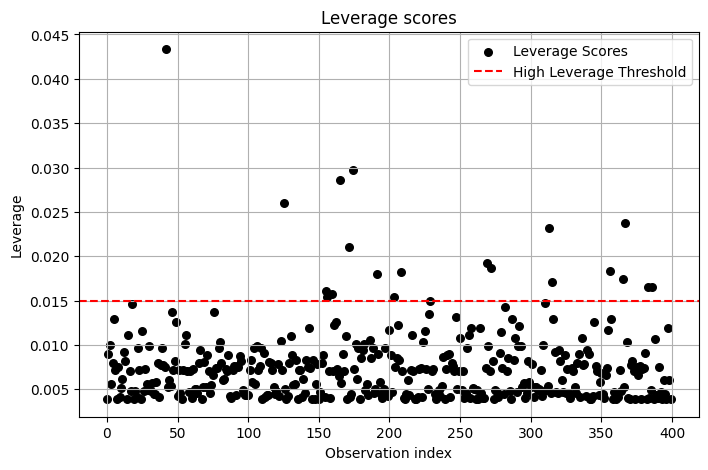

In [23]:
influence = model.get_influence()
leverage = influence.hat_matrix_diag
n, p = X.shape  # n = number of observations, p = number of predictors + 1
high_leverage_threshold = 2 * (p / n)

high_leverage_points = np.where(leverage > high_leverage_threshold)[0]
print("High Leverage Observations:", high_leverage_points)

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(range(n), leverage, color="black", s=30, label="Leverage Scores")
ax.axhline(y=high_leverage_threshold, color="red", linestyle="dashed",
           label="High Leverage Threshold")

ax.set_xlabel("Observation index")
ax.set_ylabel("Leverage")
ax.set_title("Leverage scores")
ax.legend()
ax.grid(True)

plt.show()


There are quite a few points whose leverage is higher than the threshold, however this is to be expected due to the large number of points. However, observation $ 42 $ does seem to be a true outlier.